In [1]:
#import Libraries
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [2]:
#Load Dataset
df = pd.read_csv('Datasets/covid_19_india.csv')

df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
# Function to return the day number 
# of the year for the given date

days = [31, 29, 31, 30, 31, 30, 
        31, 31, 30, 31, 30, 31]; 
def dayOfYear(each): 
      
    month = (int)(each[3:5]); 
    day = (int)(each[0:2]); 
  
    # Add the days in the previous months 
    month -= 1; 
    while (month > 0): 
        day = day + days[month - 1]; 
        month -= 1; 
    return day; 

doy=[]
for each in df.Date:
    doy.append(dayOfYear(each))

df.Date=doy
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30,6:00 PM,Kerala,1,0,0,0,1
1,2,31,6:00 PM,Kerala,1,0,0,0,1
2,3,32,6:00 PM,Kerala,2,0,0,0,2
3,4,33,6:00 PM,Kerala,3,0,0,0,3
4,5,34,6:00 PM,Kerala,3,0,0,0,3


In [4]:
# Adding All States Confirmed Cases into a single value on a particular date 
nod=30
D=[]
C=[]
while(nod<120):
    D.append(nod)
    C.append(df.loc[df['Date'] == nod, 'Confirmed'].sum())
    nod=nod+1
print(D)
print(C)



[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
[1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 6, 28, 30, 31, 34, 39, 46, 58, 60, 74, 81, 84, 110, 114, 137, 151, 173, 223, 283, 360, 433, 519, 606, 694, 724, 909, 1024, 1251, 1397, 1834, 2069, 2547, 3072, 3577, 4281, 4789, 5274, 5865, 6761, 7529, 8447, 9352, 10815, 11933, 12759, 13835, 14792, 16116, 17656, 18985, 20471, 21700, 23452, 24893, 26605, 28160, 29834]


In [5]:
#Dependent and Independent Variables
X = D
Y = C
X = np.array(X)
Y = np.array(Y)
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [6]:
# Training the Linear Regression model on the dataset
from sklearn.linear_model import LinearRegression
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

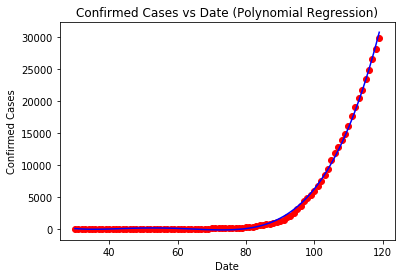

In [7]:
# Visualising the Polynomial Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Confirmed Cases vs Date (Polynomial Regression)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()